In [1]:
# importing the required packages
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
# reshaping the training and testing data (so they are in 1 color channel) 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [4]:
# normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
#printing amount of images and shape
print(x_train.shape)
print(y_train.shape)
# determine the shape of the input images
inp_shape = x_train.shape[1:]
print(inp_shape)

(60000, 28, 28, 1)
(60000,)
(28, 28, 1)


In [6]:
# define the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=inp_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
# text Description of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0

In [8]:
# beginning of training the model
# compile the model - define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# cont. of training the model
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 23s - loss: 0.2277 - accuracy: 0.9296 - val_loss: 0.0490 - val_accuracy: 0.9863 - 23s/epoch - 54ms/step
Epoch 2/10
422/422 - 23s - loss: 0.0714 - accuracy: 0.9776 - val_loss: 0.0400 - val_accuracy: 0.9877 - 23s/epoch - 54ms/step
Epoch 3/10
422/422 - 23s - loss: 0.0526 - accuracy: 0.9831 - val_loss: 0.0302 - val_accuracy: 0.9912 - 23s/epoch - 55ms/step
Epoch 4/10
422/422 - 23s - loss: 0.0418 - accuracy: 0.9868 - val_loss: 0.0292 - val_accuracy: 0.9927 - 23s/epoch - 55ms/step
Epoch 5/10
422/422 - 23s - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.0279 - val_accuracy: 0.9918 - 23s/epoch - 56ms/step
Epoch 6/10
422/422 - 23s - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0260 - val_accuracy: 0.9918 - 23s/epoch - 55ms/step
Epoch 7/10
422/422 - 23s - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.0261 - val_accuracy: 0.9938 - 23s/epoch - 54ms/step
Epoch 8/10
422/422 - 24s - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.0260 - val_accuracy: 0.9938 - 24s/epoch - 56ms/step


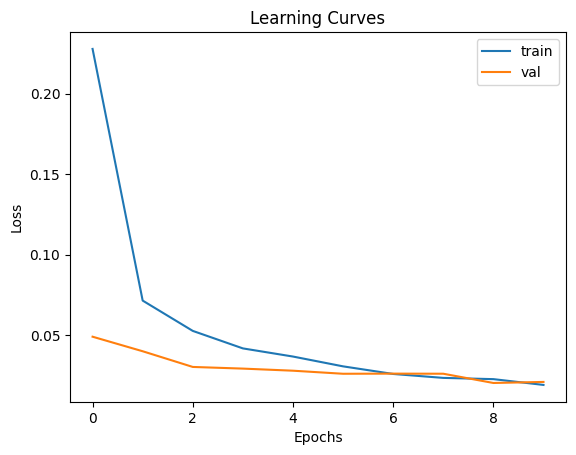

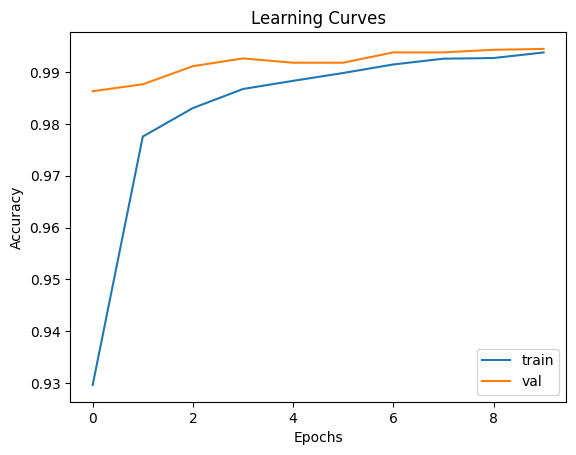

In [14]:
# evaluating the model by plotting the accuracy
pyplot.title('Learning Curves')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

pyplot.title('Learning Curves')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
pyplot.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# test the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.43000078201294


1/1 [==============================] - 0s 28ms/step
[1.0940729e-10 6.4410810e-10 4.8880580e-09 3.2053044e-10 6.1950260e-13
 1.7469101e-10 2.3788908e-15 1.0000000e+00 5.3515151e-11 9.6384074e-09]  =>  7


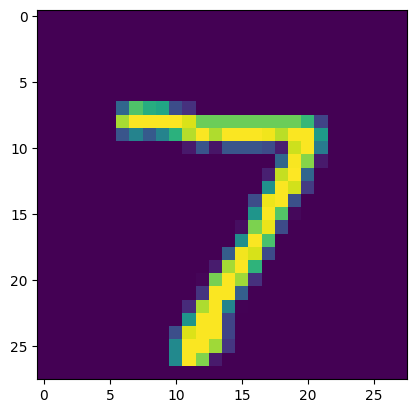

[1.3310138e-10 1.0074440e-10 1.0000000e+00 5.5869641e-15 2.8817541e-15
 1.2314054e-16 2.6075121e-12 1.8467569e-13 4.6158948e-13 9.7339372e-17]  =>  2


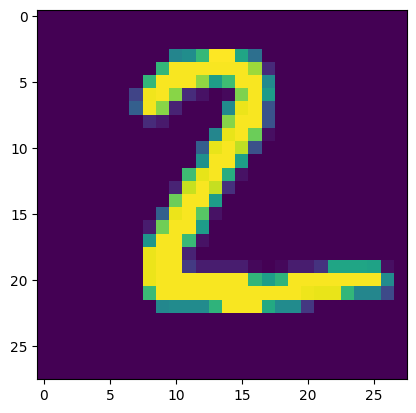

[1.6769098e-08 9.9999857e-01 2.2078034e-08 2.2722321e-12 3.9049735e-07
 1.2174802e-08 3.8352415e-09 4.4030173e-07 4.5999812e-07 1.4988693e-08]  =>  1


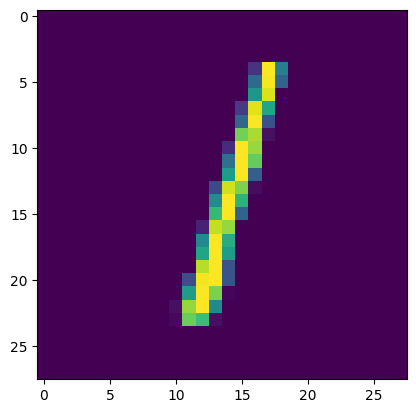

[9.9999368e-01 4.9241210e-12 6.9122610e-09 1.3143054e-09 8.0881211e-11
 2.7703162e-09 6.2288836e-06 2.0178376e-10 7.2569208e-08 4.1368569e-08]  =>  0


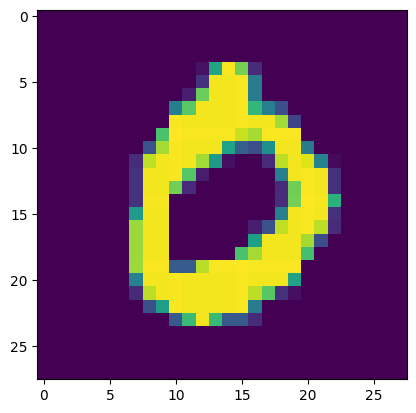

[1.1897394e-09 3.0564666e-09 5.4930052e-09 1.8753873e-11 9.9993551e-01
 1.2147300e-10 1.3310561e-08 1.4284554e-09 1.9100733e-06 6.2588981e-05]  =>  4


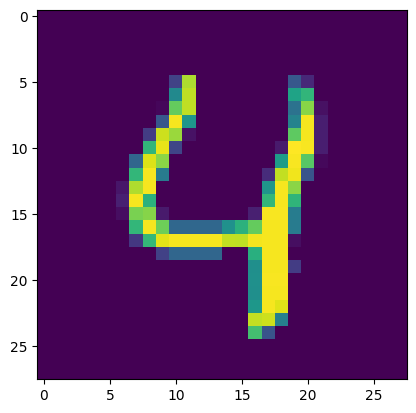

In [16]:
# prediction 
probs = model.predict(x_test[:5])
preds = np.argmax(probs, axis=1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i])
    plt.show()


313/313 [==============================] - 2s 5ms/step


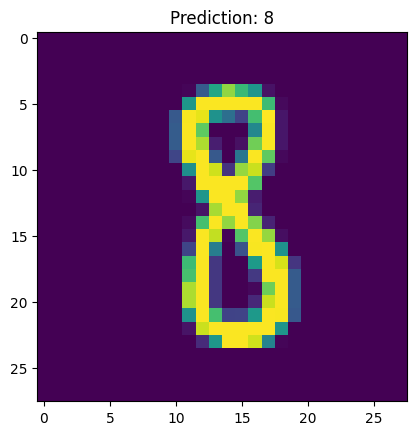

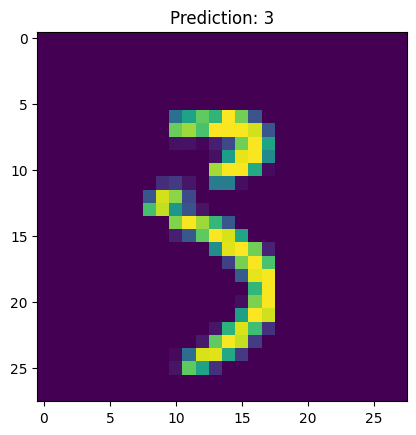

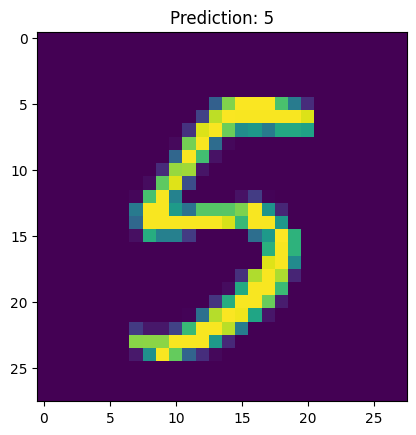

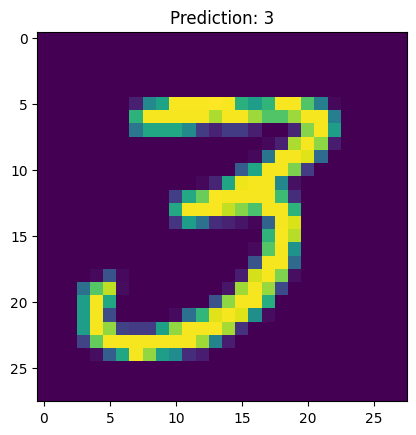

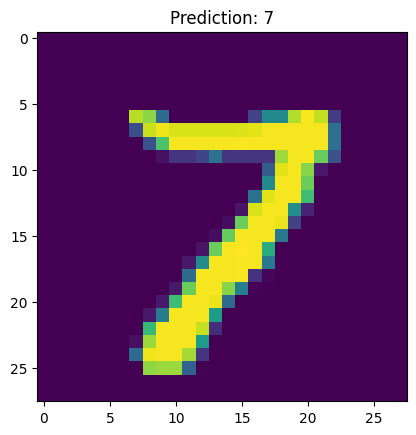

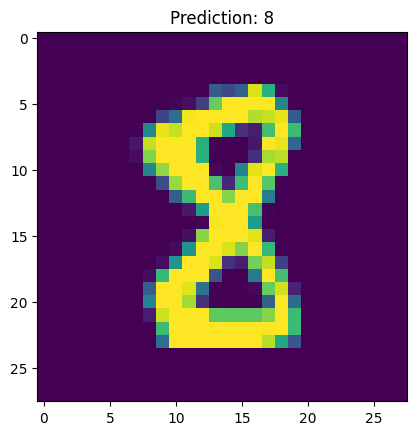

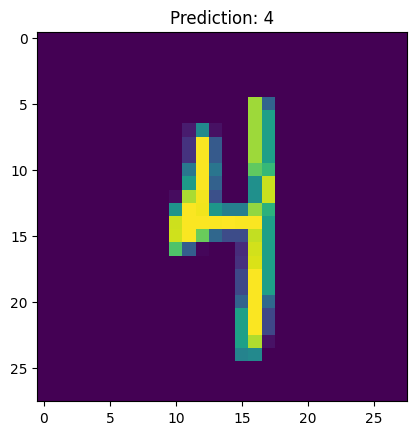

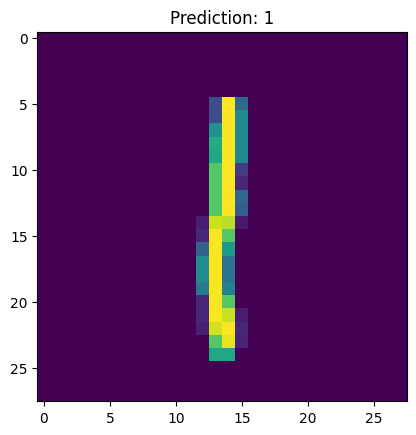

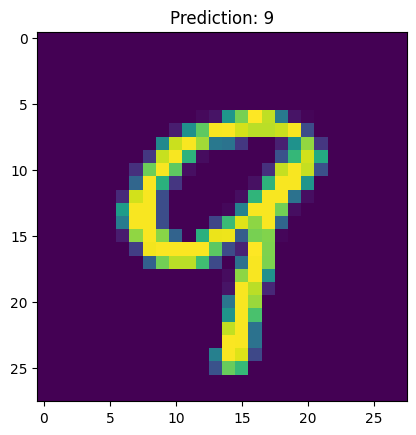

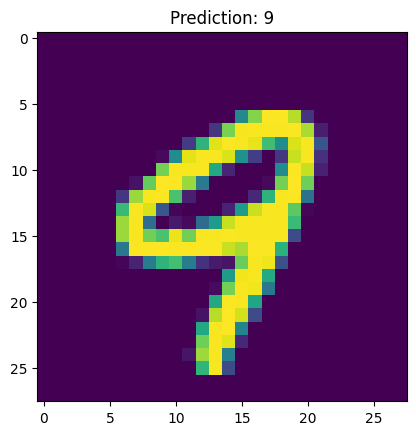

In [17]:
predictions = model.predict([x_test])

# Generate an array of random indices
random_indices = np.random.randint(0, len(predictions), size=10)

# Iterate over the random indices and print predictions with corresponding images
for index in random_indices:
    prediction = np.argmax(predictions[index])
    plt.imshow(x_test[index])
    plt.title(f"Prediction: {prediction}")
    plt.show()